In [5]:
import os
import cv2
from PIL import Image
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS as stopwords_wc



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lesterhui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
train_df = pd.read_csv('train.csv')

Total no. of images with duplicates: 1,246


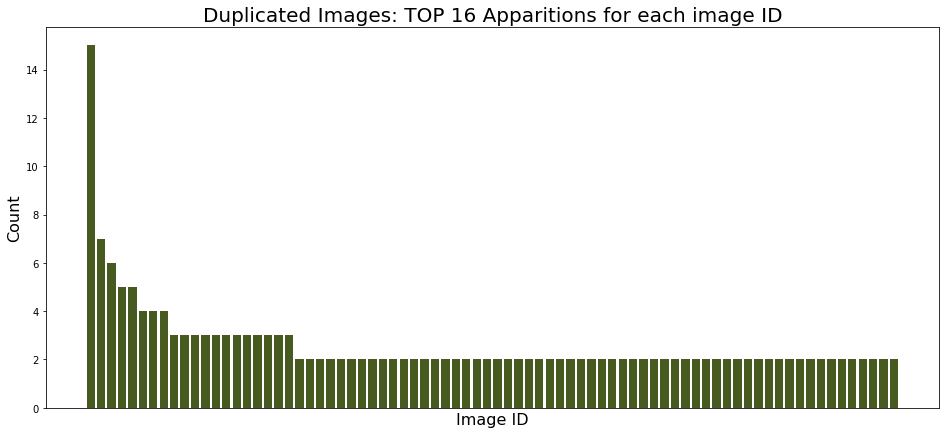

In [9]:
# Get the count of apparitions per image
image_count = train_df["image"].value_counts().reset_index()
image_count.columns = ["image", "count"]
image_count_duplicates = image_count[image_count["count"] > 1]
print("Total no. of images with duplicates: {:,}".format(len(image_count_duplicates)))
my_colors = ["#EDAC54", "#F4C5B7", "#DD7555", "#B95F18", "#475A20"]
#Plot
fig, ax = plt.subplots(figsize=(16, 7))
plt.bar(x=image_count_duplicates.iloc[::16]["image"],
        height=image_count_duplicates.iloc[::16]["count"],
        color=my_colors[4])
plt.title("Duplicated Images: TOP 16 Apparitions for each image ID", fontsize=20)
plt.xticks([])
plt.xlabel("Image ID", fontsize=16)
plt.ylabel("Count", fontsize=16);

In [14]:
# Get count of values on each group
import wandb
groups_df = train_df["label_group"].value_counts().reset_index()
groups_df.columns = ["group", "count"]

# Print info
print("No. of unique groups: {:,}".format(len(groups_df)), "\n" +
      "Max no. of apparitions in 1 group: {}".format(groups_df["count"].max()), "\n" +
      "Min no. of apparitions in 1 group: {}".format(groups_df["count"].min()))


No. of unique groups: 11,014 
Max no. of apparitions in 1 group: 51 
Min no. of apparitions in 1 group: 2
